In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import U-shape dataset from Kaggle
# Method 1: Direct download using Kaggle API (requires kaggle package and API token)
try:
    import kaggle

    # Download the dataset
    kaggle.api.dataset_download_files(
        "saifullah57/ushape-dataset", path=".", unzip=True
    )
    print("Dataset downloaded successfully using Kaggle API")
except ImportError:
    print("Kaggle package not found. Install with: pip install kaggle")
except Exception as e:
    print(f"Error downloading with Kaggle API: {e}")
    print("Trying alternative method...")

# Method 2: Load the dataset if already downloaded or use direct URL
try:
    # Try to load from local file first
    df = pd.read_csv("ushape.csv")
    print("Dataset loaded from local file")
except FileNotFoundError:
    try:
        # Alternative: Direct URL (if publicly accessible)
        url = "https://www.kaggle.com/datasets/saifullah57/ushape-dataset/download?datasetVersionNumber=1"
        print(
            "Note: For direct URL download, you may need to manually download the file"
        )
        print("Visit: https://www.kaggle.com/datasets/saifullah57/ushape-dataset")

        # For now, let's create sample U-shaped data for demonstration
        print("Creating sample U-shaped data for demonstration...")
        np.random.seed(42)
        x = np.linspace(-2, 2, 1000)
        y = x**2 + np.random.normal(0, 0.1, 1000)

        # Create sample dataset
        df = pd.DataFrame(
            {
                "x": x,
                "y": y,
                "label": (y > np.median(y)).astype(
                    int
                ),  # Binary classification based on y values
            }
        )
        print("Sample U-shaped dataset created")

    except Exception as e:
        print(f"Error: {e}")

Error downloading with Kaggle API: Could not find kaggle.json. Make sure it's located in C:\Users\Raghav\.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
Trying alternative method...
Note: For direct URL download, you may need to manually download the file
Visit: https://www.kaggle.com/datasets/saifullah57/ushape-dataset
Creating sample U-shaped data for demonstration...
Sample U-shaped dataset created


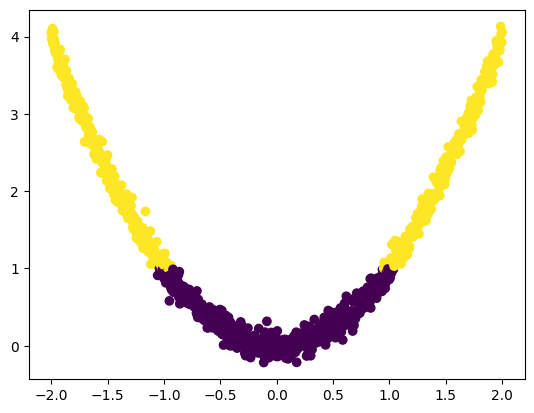

In [3]:
plt.scatter(df["x"], df["y"], c=df["label"])

In [4]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [6]:
model = Sequential()

model.add(Dense(10, activation="relu", input_dim=2, kernel_initializer="he_normal"))
model.add(Dense(10, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(10, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(10, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

C:\Users\Raghav\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.get_weights()

[array([[ 1.447517  , -1.288749  ,  0.39563847, -0.9008443 , -1.2892953 ,
         -0.639548  ,  0.09263542,  0.17489769, -0.7106542 , -1.5146896 ],
        [-1.3975813 ,  0.48106042, -0.78609186,  0.19147995,  0.7128556 ,
          0.34224975, -1.6303241 , -0.6640808 ,  1.0987033 ,  0.2381601 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.00998654,  0.42294678, -0.05111422, -0.39186728, -0.30341855,
         -0.08515245,  0.46696487, -0.5752733 , -0.12374105, -0.03008774],
        [ 0.34906477, -0.33086285,  0.8876416 , -0.5095892 ,  0.64021736,
          0.43262738,  0.37920612, -0.25117594,  0.48266312,  0.874426  ],
        [-0.9499395 ,  0.16621725,  0.22222914, -0.00649733,  0.6694333 ,
         -0.12322193, -0.68587804,  0.1234969 , -0.81457496, -0.01313165],
        [ 0.09965732,  0.2617325 , -0.84411675,  0.13986102, -0.43473807,
         -0.7743727 ,  0.50977254,  0.21428573,  0.65765107,  0.04718612],
        [-0.17695

In [8]:
initial_weights = model.get_weights()

In [9]:
model.set_weights(initial_weights)

In [10]:
model.get_weights()

[array([[ 1.447517  , -1.288749  ,  0.39563847, -0.9008443 , -1.2892953 ,
         -0.639548  ,  0.09263542,  0.17489769, -0.7106542 , -1.5146896 ],
        [-1.3975813 ,  0.48106042, -0.78609186,  0.19147995,  0.7128556 ,
          0.34224975, -1.6303241 , -0.6640808 ,  1.0987033 ,  0.2381601 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.00998654,  0.42294678, -0.05111422, -0.39186728, -0.30341855,
         -0.08515245,  0.46696487, -0.5752733 , -0.12374105, -0.03008774],
        [ 0.34906477, -0.33086285,  0.8876416 , -0.5095892 ,  0.64021736,
          0.43262738,  0.37920612, -0.25117594,  0.48266312,  0.874426  ],
        [-0.9499395 ,  0.16621725,  0.22222914, -0.00649733,  0.6694333 ,
         -0.12322193, -0.68587804,  0.1234969 , -0.81457496, -0.01313165],
        [ 0.09965732,  0.2617325 , -0.84411675,  0.13986102, -0.43473807,
         -0.7743727 ,  0.50977254,  0.21428573,  0.65765107,  0.04718612],
        [-0.17695

In [11]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
history = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7188 - loss: 0.6796 - val_accuracy: 0.6750 - val_loss: 0.6806
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7262 - loss: 0.5520 - val_accuracy: 0.8500 - val_loss: 0.6167
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7788 - loss: 0.5043 - val_accuracy: 0.7350 - val_loss: 0.6100
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8450 - loss: 0.4583 - val_accuracy: 0.7250 - val_loss: 0.5837
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8763 - loss: 0.4077 - val_accuracy: 0.8100 - val_loss: 0.5207
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9100 - loss: 0.3512 - val_accuracy: 0.8800 - val_loss: 0.4272
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9175 - loss: 0.2965 - val_accuracy: 0.9550 - val_loss: 0.3311
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9237 - loss: 0.2433 - val_accuracy: 0.9650 - 

In [13]:
model.get_weights()

[array([[ 1.4230244 , -1.2213373 ,  0.26626065, -0.9489137 , -1.1781061 ,
         -0.5309575 ,  0.02242061,  0.33624855, -0.400212  , -1.5784498 ],
        [-1.5951579 ,  0.57971424, -0.69753027, -0.01332783,  0.77876633,
          0.530286  , -1.4596303 , -0.60041285,  1.5144802 ,  0.06048823]],
       dtype=float32),
 array([ 0.37920874, -0.26720798, -0.14816593,  0.39813834, -0.30376768,
        -0.39462548, -0.15469274,  0.30128235, -0.14453547,  0.37684056],
       dtype=float32),
 array([[ 0.45058805,  0.9105567 , -0.24890925,  0.14329626, -0.30341855,
          0.32615897,  0.9697475 , -0.5752733 ,  0.26166147,  0.19815877],
        [ 0.44764107, -0.30281964,  0.9560276 , -0.4542367 ,  0.6286058 ,
          0.37576616,  0.3238222 , -0.25117594,  0.4107537 ,  0.87619525],
        [-0.81594115,  0.2408186 ,  0.2512916 , -0.01077685,  0.6694333 ,
         -0.01984099, -0.6113183 ,  0.1234969 , -0.7736305 ,  0.07078158],
        [ 0.3946837 ,  0.44934693, -0.8869205 ,  0.33679992, 

In [14]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype("int"), clf=model, legend=2)

ModuleNotFoundError: No module named 'mlxtend'

In [15]:
(np.random.randn(10, 10) * 0.01).min()

np.float64(-0.028485426206300755)

In [16]:
(np.random.randn(10, 10) * 0.01).max()

np.float64(0.02439752406339273)